In [1]:
import image_registration
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
from functools import partial


In [2]:
source, target = image_registration.generate_data(apply_blur=True)
image_registration.plot_3d_surface_interactive_surface(source, title="Source Surface (Interactive)")
image_registration.plot_3d_surface_interactive_surface(target, title="Target Surface (Interactive)")

In [3]:
transformed_source = image_registration.pycpd_registration(source, target)
clear_output(wait=False)

error = image_registration.calculate_error(transformed_source, target)
print(f"Registration Error (MSE): {error}")
image_registration.visualize_interactive_plot(source, target, transformed_source)

Registration Error (MSE): 0.7697798459071011


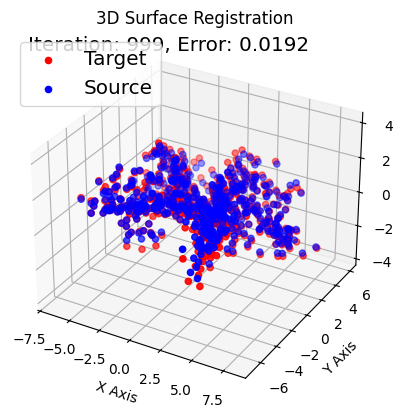

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
reg = image_registration.DeformableRegistration_Custom(target, source)
callback = partial(image_registration.visualize_plot, ax=ax)
transformation_matrix = reg.register(callback)
transformed_source = reg.model(reg.apply_transformation(reg.source), training=False).numpy()

In [9]:
error = image_registration.calculate_error(transformed_source, target)
print(f"Registration Error (MSE): {error}")
image_registration.visualize_interactive_plot(source, target, transformed_source)
image_registration.create_gif_with_variable_duration(r'gif_folder', r'gif_custom\output.gif')

Registration Error (MSE): 0.011446069926023483


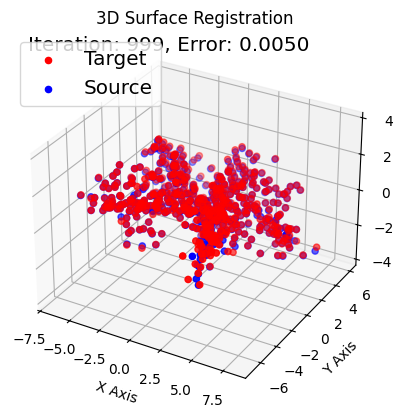

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
reg = image_registration.DeformableRegistration_Custom2(target, source)
callback = partial(image_registration.visualize_plot, ax=ax)
transformation_matrix = reg.register(callback)
transformed_source = reg.model(reg.apply_transformation(reg.source), training=False).numpy()

In [7]:
error = image_registration.calculate_error(transformed_source, target)
print(f"Registration Error (MSE): {error}")
image_registration.visualize_interactive_plot(source, target, transformed_source)
image_registration.create_gif_with_variable_duration(r'gif_folder', r'gif_custom2\output.gif')

Registration Error (MSE): 0.05736720561981201
